In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pylab as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from utils.embedding import *
from utils.geometry import *
from utils.constants import *
from shapely.geometry import Point, LineString, Polygon, LinearRing

SyntaxError: invalid syntax (embedding.py, line 186)

In [16]:
chip_1, chip_2, connections = data_prepare()

In [17]:
new_points, subsequences = layers(chip_1, chip_2, connections)

In [18]:
subsequences_by_layers_1 = [[0, 1], [4, 7], [3, 6], [2, 5]]
subsequences_by_layers_2 = [[0, 7], [1, 6], [2, 5], [3, None], [4, None]]
K, L, V, S, mind, int_lines_list, ext_lines_list = \
        objective(connections, subsequences, subsequences_by_layers_1, chip_1, chip_2)
print "K = ", K
print "L = ", L
print "V = ", V
print "S = ", S
print "mind = ", mind

0.1 0.1
0.100362942143 0.1
0.103358953809 0.1
0.103358932679 0.1
K =  4.95386998125
L =  4.0
V =  40.0
S =  691.278755453
mind =  0.1


In [19]:
jump_coordinates, jump_lines = get_jumps(connections, subsequences[subsequences_by_layers_1[0][0]], 
                                         subsequences[subsequences_by_layers_1[0][1]], chip_1, chip_2, 1)

In [20]:
submit("ans", int_lines_list, ext_lines_list, jump_lines, jump_coordinates)

In [21]:
internal, external, jump_lines = get_lines(connections, subsequences[0], subsequences[1], chip_1, chip_2, 1)

In [22]:
internal, external = optimize_embedding(internal, external, jump_lines, chip_1, chip_2)

In [23]:
print min_distance_to_pins(internal, chip_1.values)
print min_distance_to_pins(internal, chip_2.values)
print min_distance_to_pins(external, chip_1.values)
print min_distance_to_pins(external, chip_2.values)

0.1
0.115107014646
0.1
0.1


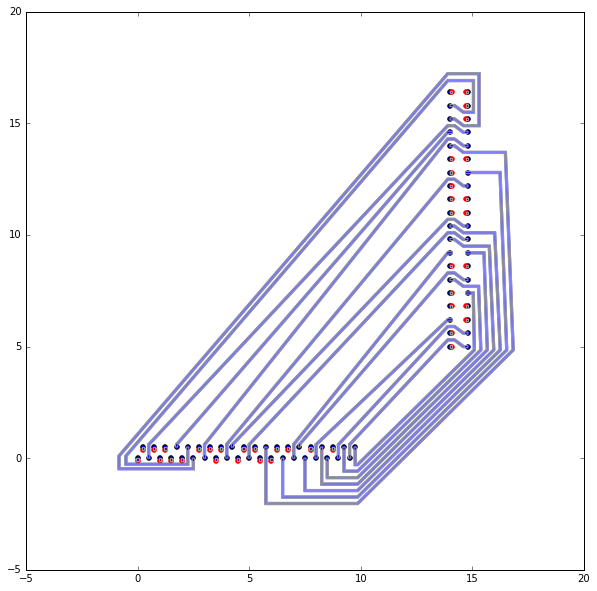

In [25]:
plot_all_lines(internal, 0.05)
plot_all_lines(external, 0.05)

plt.scatter(chip_1.values.T[0], chip_1.values.T[1])
plt.scatter(chip_2.values.T[0], chip_2.values.T[1])
plt.scatter(np.array(jump_coordinates).T[0], np.array(jump_coordinates).T[1], color = 'r')

plot_all_lines(jump_lines, 0.05)

In [16]:
jump_lines

array([[[  5.50000000e+00,   0.00000000e+00],
        [  5.50000000e+00,  -1.01000000e-01]],

       [[  1.40000000e+01,   5.10200000e+00],
        [  1.40000000e+01,   5.00000000e+00]],

       [[  6.25000000e+00,   5.00000000e-01],
        [  6.25000000e+00,   3.99000000e-01]],

       [[  1.40000000e+01,   5.70200000e+00],
        [  1.40000000e+01,   5.60000000e+00]],

       [[  7.75000000e+00,   5.00000000e-01],
        [  7.75000000e+00,   3.99000000e-01]],

       [[  1.48000000e+01,   1.32980000e+01],
        [  1.48000000e+01,   1.34000000e+01]],

       [[  1.25000000e+00,   5.00000000e-01],
        [  1.25000000e+00,   3.99000000e-01]],

       [[  1.40000000e+01,   6.90200000e+00],
        [  1.40000000e+01,   6.80000000e+00]],

       [[  7.50000000e-01,   5.00000000e-01],
        [  7.50000000e-01,   3.99000000e-01]],

       [[  1.40000000e+01,   7.50200000e+00],
        [  1.40000000e+01,   7.40000000e+00]],

       [[  6.00000000e+00,   0.00000000e+00],
        [  6.0

In [16]:
all_lines = []

for line in internal:
    all_lines.append(line)
    
for line in external:
    all_lines.append(line)
    
for line in jump_lines:
    all_lines.append(line)

In [17]:
print min_distance(internal)
print min_distance(external)
print min_distance(all_lines)

0.0921712402577
0.103359032924
0.0877498923829


In [13]:
print sum_length(internal)
print sum_length(external)
print sum_length(all_lines)
ans.append(sum_length(all_lines))

154.456584235
199.188725506
353.645309741


NameError: name 'ans' is not defined

In [79]:
np.sum(ans)

647.28921305222104

In [14]:
external_polys = [line_to_poly(raw_line) for raw_line in external]

In [16]:
poly =  line_to_poly([(0, 0), (1, 0), (1, 1)], distance=0.00000001)

In [17]:
LinearRing(np.array(poly.exterior.xy).T).distance(Point(2, 0.5))

0.9999999900000002

In [19]:
plot_all_lines([[(0, 0), (1, 0), (1, 1)], [(2, 0.5), (3, 0.5)]], 0.0001)

In [20]:
plt.show()

In [30]:
from utils.embedding import embedding

In [19]:
LinearRing(np.array(line_to_poly(internal[-1]).exterior.xy).T).distance(Point(chip_2.values[13]))

0.024046578391980072

In [18]:
Point(chip_2.values[13]).area

0.0

In [15]:
line_to_poly(internal[-1]).exterior.xy

(array('d', [0.45000000000000007, 13.477933608101893, 14.850000000000101, 14.850000000000001, 14.75, 14.75, 13.522066391898106, 0.55, 0.55, 0.45, 0.45000000000000007]),
 array('d', [0.5193804680421552, 14.799999999999999, 14.799999999999999, 14.6, 14.6, 14.7, 14.7, 0.48061953195784485, 0.0, 0.0, 0.5193804680421552]))

In [10]:
line_to_poly(internal[-2]).exterior.xy

(array('d', [13.95, 13.95, 14.05, 14.049999999999883, 1.787570382791797, 1.712429617208203, 13.95]),
 array('d', [14.468837369526353, 14.6, 14.6, 14.431162630473512, 0.46700808679573375, 0.5329919132042662, 14.468837369526353]))

In [22]:
min_distance([internal[0], internal[-1]])

0.0

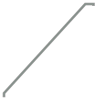

In [16]:
line_to_poly(internal[-1])

In [18]:
np.max(list(zip(*chip_1.values)[0]))

9.75

In [20]:
np.max(list(zip(*chip_2.values)[0]))

14.800000000000001

In [37]:
LinearRing(np.array(line_to_poly(internal[1]).exterior.xy).T).distance(
                LinearRing(np.array(line_to_poly(external[0]).exterior.xy).T))

0.017241379310345372

ValueError: all the input array dimensions except for the concatenation axis must match exactly

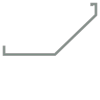

In [24]:
line_to_poly(external[1])

In [38]:
internal[1]

array([[  9.  ,   0.  ],
       [  9.  ,   0.  ],
       [  9.  ,   0.5 ],
       [ 14.  ,   5.75],
       [ 14.8 ,   5.75],
       [ 14.8 ,   5.6 ]])

In [54]:
min_distance([internal[1],internal[2]])

0.10052897184483285

In [52]:
min_distance([external[0], internal[1]])

0.09999999999999662

In [49]:
for lines in internal:
    aaa = external.tolist()
    aaa.append(lines.tolist())
    print min_distance(aaa)

0.0937204283533
0.101298642209
0.101298642209
0.1
0.101298642209
0.1
0.1
0.101298642209
0.1
0.101298642209
0.101298642209


In [46]:
aaa = external.tolist()

In [47]:
aaa.append(internal[1].tolist())

In [48]:
min_distance(aaa)

0.10129864220864224

In [26]:
subsequences

[[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
 [24, 5, 27, 8, 9, 33, 15, 17, 18],
 [0, 22, 3, 4, 30],
 [1, 6, 26, 10, 11],
 [13, 14, 37, 38, 19],
 [31, 12],
 [34, 39],
 [23]]

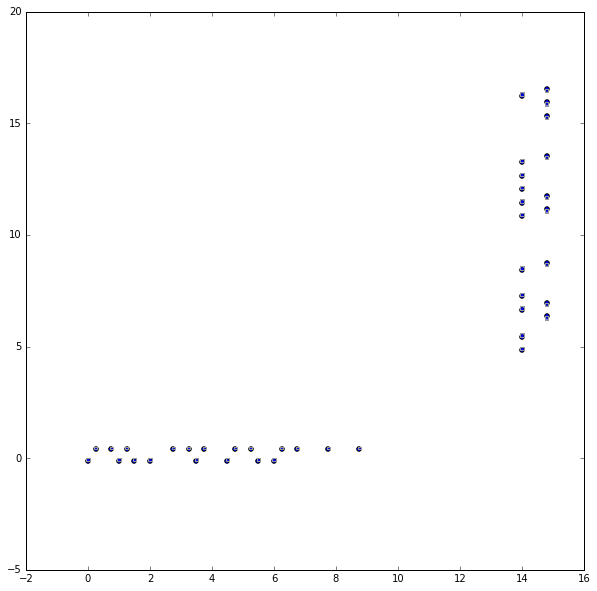

In [32]:
aaa = np.array(get_jumps(connections, subsequences[0], subsequences[1], chip_1, chip_2, 1)).T
plot_all_lines(jump_lines, 0.05)
plt.scatter(aaa[0], aaa[1])

In [30]:
len(subsequences)

8

In [14]:
aaa.shape

(2, 40)

In [15]:
subsequences

[[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
 [24, 5, 27, 8, 9, 33, 15, 17, 18],
 [0, 22, 3, 4, 30],
 [1, 6, 26, 10, 11],
 [13, 14, 37, 38, 19],
 [31, 12],
 [34, 39],
 [23]]

In [33]:
internal

array([[[  9.5 ,   0.  ],
        [  9.5 ,   0.  ],
        [  9.5 ,   0.5 ],
        [ 14.  ,   5.15],
        [ 14.8 ,   5.15],
        [ 14.8 ,   5.  ]],

       [[  9.  ,   0.  ],
        [  9.  ,   0.  ],
        [  9.  ,   0.5 ],
        [ 14.  ,   5.75],
        [ 14.8 ,   5.75],
        [ 14.8 ,   5.6 ]],

       [[  8.  ,   0.  ],
        [  8.  ,   0.  ],
        [  8.  ,   0.5 ],
        [ 14.  ,   6.05],
        [ 14.  ,   6.05],
        [ 14.  ,   6.2 ]],

       [[  7.25,   0.5 ],
        [  7.25,   0.5 ],
        [  7.25,   0.5 ],
        [ 14.  ,   8.15],
        [ 14.8 ,   8.15],
        [ 14.8 ,   8.  ]],

       [[  7.  ,   0.  ],
        [  7.  ,   0.  ],
        [  7.  ,   0.5 ],
        [ 14.  ,   9.05],
        [ 14.  ,   9.05],
        [ 14.  ,   9.2 ]],

       [[  5.  ,   0.  ],
        [  5.  ,   0.  ],
        [  5.  ,   0.5 ],
        [ 14.  ,   9.95],
        [ 14.8 ,   9.95],
        [ 14.8 ,   9.8 ]],

       [[  4.25,   0.5 ],
        [  4.25,   0.5 ],


In [35]:
internal

array([[[  9.5 ,   0.  ],
        [  9.5 ,   0.  ],
        [  9.5 ,   0.5 ],
        [ 14.  ,   5.15],
        [ 14.8 ,   5.15],
        [ 14.8 ,   5.  ]],

       [[  9.  ,   0.  ],
        [  9.  ,   0.  ],
        [  9.  ,   0.5 ],
        [ 14.  ,   5.75],
        [ 14.8 ,   5.75],
        [ 14.8 ,   5.6 ]],

       [[  8.  ,   0.  ],
        [  8.  ,   0.  ],
        [  8.  ,   0.5 ],
        [ 14.  ,   6.05],
        [ 14.  ,   6.05],
        [ 14.  ,   6.2 ]],

       [[  7.25,   0.5 ],
        [  7.25,   0.5 ],
        [  7.25,   0.5 ],
        [ 14.  ,   8.15],
        [ 14.8 ,   8.15],
        [ 14.8 ,   8.  ]],

       [[  7.  ,   0.  ],
        [  7.  ,   0.  ],
        [  7.  ,   0.5 ],
        [ 14.  ,   9.05],
        [ 14.  ,   9.05],
        [ 14.  ,   9.2 ]],

       [[  5.  ,   0.  ],
        [  5.  ,   0.  ],
        [  5.  ,   0.5 ],
        [ 14.  ,   9.95],
        [ 14.8 ,   9.95],
        [ 14.8 ,   9.8 ]],

       [[  4.25,   0.5 ],
        [  4.25,   0.5 ],


In [7]:
subsequences

[[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
 [24, 5, 27, 8, 9, 33, 15, 17, 18],
 [0, 22, 3, 4, 30],
 [1, 6, 26, 10, 11],
 [13, 14, 37, 38, 19],
 [31, 12],
 [34, 39],
 [23]]

In [47]:
np.array(jump_coordinates).T

array([[  5.5  ,  14.   ,   6.25 ,  14.   ,   1.25 ,  14.   ,   0.75 ,
         14.   ,   9.25 ,  14.   ,   4.75 ,  14.   ,   8.25 ,  14.   ,
          7.5  ,  14.   ,   1.5  ,  14.   ,   1.   ,  14.   ,   2.   ,
         14.   ,   8.75 ,  14.   ,   6.75 ,  14.   ,   5.75 ,  14.   ,
          2.5  ,  14.   ,   2.25 ,  14.   ,   3.25 ,  14.   ,   2.75 ,
         14.8  ,   0.   ,  14.8  ,   9.75 ,  14.8  ,   3.75 ,  14.8  ,
          8.5  ,  14.8  ,   0.25 ,  14.8  ,   5.25 ,  14.8  ,   6.5  ,
         14.8  ,   6.   ,  14.8  ,   4.5  ,  14.8  ],
       [ -0.11 ,   4.85 ,   0.39 ,   5.45 ,   0.39 ,   6.65 ,   0.39 ,
          7.25 ,   0.39 ,   7.85 ,   0.39 ,   8.45 ,   0.39 ,   9.65 ,
         -0.11 ,  10.25 ,  -0.11 ,  10.85 ,  -0.11 ,  11.45 ,  -0.11 ,
         12.05 ,   0.39 ,  12.65 ,   0.39 ,  13.25 ,   0.39 ,  13.85 ,
         -0.11 ,  15.05 ,   0.39 ,  15.65 ,   0.39 ,  16.25 ,   0.39 ,
          6.35 ,  -0.109,   6.95 ,   0.39 ,   7.55 ,   0.39 ,   8.75 ,
         -0.11 ,   9.35

In [11]:
external

array([], dtype=float64)

In [12]:
a = None

In [13]:
b = [1,2,3]

In [14]:
b[a]

TypeError: list indices must be integers, not NoneType

In [8]:
subsequences

[[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
 [24, 5, 27, 8, 9, 33, 15, 17, 18],
 [0, 22, 3, 4, 30],
 [1, 6, 26, 10, 11],
 [13, 14, 37, 38, 19],
 [31, 12],
 [34, 39],
 [23]]

In [7]:
subsequences_by_layers_2

[[0, 7], [1, 6], [2, 5], [3, None], [4, None]]

In [31]:
jump_lines

array([[[  5.50000000e+00,   0.00000000e+00],
        [  5.50000000e+00,  -1.10000000e-01]],

       [[  1.40000000e+01,   5.00000000e+00],
        [  1.40000000e+01,   4.85000000e+00]],

       [[  6.25000000e+00,   5.00000000e-01],
        [  6.25000000e+00,   3.90000000e-01]],

       [[  1.40000000e+01,   5.60000000e+00],
        [  1.40000000e+01,   5.45000000e+00]],

       [[  7.75000000e+00,   5.00000000e-01],
        [  7.75000000e+00,   3.90000000e-01]],

       [[  1.48000000e+01,   1.34000000e+01],
        [  1.48000000e+01,   1.35500000e+01]],

       [[  1.25000000e+00,   5.00000000e-01],
        [  1.25000000e+00,   3.90000000e-01]],

       [[  1.40000000e+01,   6.80000000e+00],
        [  1.40000000e+01,   6.65000000e+00]],

       [[  7.50000000e-01,   5.00000000e-01],
        [  7.50000000e-01,   3.90000000e-01]],

       [[  1.40000000e+01,   7.40000000e+00],
        [  1.40000000e+01,   7.25000000e+00]],

       [[  6.00000000e+00,   0.00000000e+00],
        [  6.0

In [10]:
subsequences[0]

[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36]

In [22]:
connections.values[subsequences[0]]+1

array([[20, 21],
       [19, 22],
       [17,  3],
       [35, 26],
       [15,  8],
       [11, 29],
       [29, 30],
       [ 9, 33],
       [ 7, 36],
       [24, 17],
       [ 2, 37]])

In [15]:
len(jump_coordinates)

54

In [16]:
len(jump_lines)

54

In [17]:
a = [1,2,3]
b = [4,5,6]

In [18]:
for x,y in a,b:
    print x-y

ValueError: too many values to unpack

In [13]:
int_lines_list

[array([[[  9.5  ,   0.   ],
         [  9.5  ,   0.   ],
         [  9.5  ,   0.507],
         [ 13.885,   5.15 ],
         [ 14.8  ,   5.15 ],
         [ 14.8  ,   5.   ]],
 
        [[  9.   ,   0.   ],
         [  9.   ,   0.   ],
         [  9.   ,   0.506],
         [ 13.884,   5.75 ],
         [ 14.8  ,   5.75 ],
         [ 14.8  ,   5.6  ]],
 
        [[  8.   ,   0.   ],
         [  8.   ,   0.   ],
         [  8.   ,   0.519],
         [ 13.909,   6.05 ],
         [ 14.   ,   6.05 ],
         [ 14.   ,   6.2  ]],
 
        [[  7.25 ,   0.5  ],
         [  7.25 ,   0.5  ],
         [  7.25 ,   0.5  ],
         [ 13.881,   8.15 ],
         [ 14.8  ,   8.15 ],
         [ 14.8  ,   8.   ]],
 
        [[  7.   ,   0.   ],
         [  7.   ,   0.   ],
         [  7.   ,   0.511],
         [ 14.   ,   9.05 ],
         [ 14.   ,   9.05 ],
         [ 14.   ,   9.2  ]],
 
        [[  5.   ,   0.   ],
         [  5.   ,   0.   ],
         [  5.   ,   0.507],
         [ 13.885,   9.95 ],

In [13]:
submit([np.array([[[  1.75 ,   0.5  ],
         [  1.75 ,   14.6  ],
         [ 14.   ,  14.6  ]]])],
      [],[],[])

POLY 6, 1
1,7; 14,65
14,0; 14,65
14,0; 14,55
1,8; 14,55
1,8; 0,5
1,7; 0,5


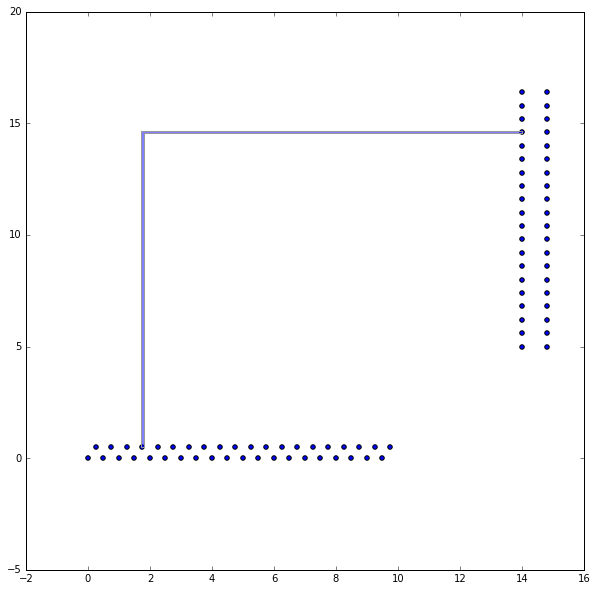

In [11]:
plot_all_lines(np.array([[[  1.75 ,   0.5  ],
         [  1.75 ,   14.6  ],
         [ 14.   ,  14.6  ]]]), 0.05)
plt.scatter(chip_1.values.T[0], chip_1.values.T[1])
plt.scatter(chip_2.values.T[0], chip_2.values.T[1])

In [12]:
connections, subsequences

(     0   1
 0   11   0
 1   32   1
 2   16   2
 3   22   3
 4   21   4
 5   38   5
 6   29   6
 7   14   7
 8   36   8
 9   15   9
 10   3  10
 11   2  11
 12   4  12
 13  37  13
 14  33  14
 15  31  15
 16  23  16
 17   5  17
 18  24  18
 19  26  19
 20  19  20
 21  18  21
 22  25  22
 23   0  23
 24  39  24
 25  34  25
 26  27  26
 27  17  27
 28  10  28
 29  28  29
 30  20  30
 31  30  31
 32   8  32
 33  13  33
 34  35  34
 35   6  35
 36   1  36
 37  12  37
 38   9  38
 39   7  39,
 [[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
  [24, 5, 27, 8, 9, 33, 15, 17, 18],
  [0, 22, 3, 4, 30],
  [1, 6, 26, 10, 11],
  [13, 14, 37, 38, 19],
  [31, 12],
  [34, 39],
  [23]])

In [75]:
jump_coordinates[28:30]

[[2.5, -0.11], [14.0, 15.049999999999999]]

In [78]:
jump_lines[28:30]

array([[[  2.5 ,   0.  ],
        [  2.5 ,  -0.11]],

       [[ 14.  ,  15.2 ],
        [ 14.  ,  15.05]]])

In [114]:
line_to_poly(jump_lines[29]).intersects(Point(jump_coordinates[29]))

True

In [8]:
submit([np.array([]), np.array([int_lines_list[1][7]])], [], jump_lines[28:30], jump_coordinates[28:30])

In [31]:
a = range(-1,5)

In [44]:
a[0:]

[-1, 0, 1, 2, 3, 4]

In [59]:
type(internal)

numpy.ndarray

In [63]:
external[0].shape

(8, 2)

In [64]:
sum_length([])

0.0